In [96]:
import docplex.mp
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

import random


In [97]:
import pandas as pd
from scipy.spatial import distance_matrix

In [98]:
pwd

'C:\\Users\\admin'

In [99]:
url_c101 = r"C:\Users\admin\Desktop\Research Seminar TW-VRP\solomon raw\c101.csv"

In [100]:
df_orig = pd.read_csv(url_c101, encoding='latin1', error_bad_lines=False)
df_orig.head(76)

,CUSTNO,XCOORD,YCOORD,DEMAND,READYTIME,DUETIME,SERVICETIME,CAPACITY
0,1,40,50,0,0,1236,0,200.0
1,2,45,68,10,912,967,90,NaN
2,3,45,70,30,825,870,90,NaN
3,4,42,66,10,65,146,90,NaN
4,5,42,68,10,727,782,90,NaN
...,...,...,...,...,...,...,...,...
71,72,95,35,20,293,360,90,NaN
72,73,53,30,10,450,505,90,NaN
73,74,92,30,10,478,551,90,NaN
74,75,53,35,50,353,412,90,NaN


In [101]:
cust_size = 30
random.seed(10)
list_data = random.sample(range(1, len(df_orig)-1), cust_size)
list_data.insert(0,0)
df = df_orig.iloc[list_data]
#
df = df.reset_index(drop=True)
#
df.head(cust_size+1)

,CUSTNO,XCOORD,YCOORD,DEMAND,READYTIME,DUETIME,SERVICETIME,CAPACITY
0,1,40,50,0,0,1236,0,200.0
1,75,53,35,50,353,412,90,NaN
2,6,42,65,10,15,67,90,NaN
3,56,42,15,10,95,158,90,NaN
4,63,50,35,20,262,317,90,NaN
5,100,55,80,10,743,820,90,NaN
6,3,45,70,30,825,870,90,NaN
7,28,23,52,10,261,316,90,NaN
8,61,35,5,20,562,629,90,NaN
9,64,50,40,50,171,218,90,NaN


In [102]:
print('Number of customers:', cust_size)

Number of customers: 30


In [103]:
n = cust_size
Q = df['CAPACITY'][0]

In [104]:
C = [i for i in range(1, n + 1)]
Cc = [0] + C + [n + 1]
V = [i for i in range(1, n+1)]

In [105]:
df2 = df.iloc[:, 1:3]
df2.loc[n + 1, :] = df2.loc[0, :]

In [106]:
dist_matrix = pd.DataFrame(distance_matrix(df2.values, df2.values), index=df2.index, columns=df2.index)

In [107]:
dist_matrix.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000000,19.849433,15.132746,35.057096,18.027756,33.541020,20.615528,17.117243,45.276926,14.142136,...,35.355339,20.591260,19.209373,51.078371,39.293765,32.388269,35.057096,13.000000,40.311289,0.000000
1,19.849433,0.000000,31.953091,22.825424,3.000000,45.044423,35.902646,34.481879,34.985711,5.830952,...,55.172457,23.194827,25.000000,34.365681,51.244512,46.097722,25.000000,32.015621,53.935146,19.849433
2,15.132746,31.953091,0.000000,50.000000,31.048349,19.849433,5.830952,23.021729,60.406953,26.248809,...,28.792360,35.114100,33.105891,57.008771,47.169906,39.446166,50.159745,17.204651,46.518813,15.132746
3,35.057096,22.825424,50.000000,0.000000,21.540659,66.287254,55.081757,41.593269,12.206556,26.248809,...,65.795137,20.808652,24.413111,47.434165,47.169906,45.343136,4.000000,42.379240,51.613952,35.057096
4,18.027756,3.000000,31.048349,21.540659,0.000000,45.276926,35.355339,31.906112,33.541020,5.000000,...,53.150729,20.223748,22.000000,37.336309,48.259714,43.174066,23.323808,29.732137,50.990195,18.027756
5,33.541020,45.044423,19.849433,66.287254,45.276926,0.000000,14.142136,42.520583,77.620873,40.311289,...,40.311289,54.120237,52.478567,59.363288,66.400301,58.600341,67.186308,36.796739,65.192024,33.541020
6,20.615528,35.902646,5.830952,55.081757,35.355339,14.142136,0.000000,28.425341,65.764732,30.413813,...,30.413813,40.853396,38.910153,58.000000,52.430907,44.654227,55.443665,22.671568,51.478151,20.615528
7,17.117243,34.481879,23.021729,41.593269,31.906112,42.520583,28.425341,0.000000,48.507731,29.546573,...,24.351591,21.189620,17.720045,67.675697,24.186773,16.552945,39.924930,5.830952,24.041631,17.117243
8,45.276926,34.985711,60.406953,12.206556,33.541020,77.620873,65.764732,48.507731,0.000000,38.078866,...,72.801099,27.459060,30.805844,57.697487,48.104054,48.259714,10.440307,50.487622,53.150729,45.276926
9,14.142136,5.830952,26.248809,26.248809,5.000000,40.311289,30.413813,29.546573,38.078866,0.000000,...,49.497475,21.540659,22.561028,38.327536,48.000000,42.296572,27.730849,26.627054,50.249378,14.142136


In [108]:
e = [df['READYTIME'][i] for i in range(n + 1)]
e.append(df['READYTIME'][0])

In [109]:
len(e)

32

In [110]:
l = [df['DUETIME'][i] for i in range(n + 1)]
l.append(df['DUETIME'][0])

In [111]:
l

[1236,
 412,
 67,
 158,
 317,
 820,
 870,
 316,
 629,
 218,
 716,
 523,
 965,
 84,
 77,
 889,
 149,
 410,
 100,
 1127,
 702,
 257,
 254,
 509,
 1066,
 731,
 434,
 816,
 740,
 777,
 624,
 1236]

In [112]:
ser = [df['SERVICETIME'][i] for i in range(n + 1)]
ser.append(df['SERVICETIME'][0])

In [113]:
ser

[0,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 90,
 0]

In [114]:
r = [df['DEMAND'][i] for i in range(n + 1)]
r.append(0)

In [115]:
len(r)

32

In [116]:
# Variable set
#X = [(i, j, k) for i in Cc for j in Cc for k in V if (i != j and j!=0 and i!=n+1)]
X = [(i, j, k) for i in Cc for j in Cc for k in V if (i != j)]
S = [(i, k) for i in Cc for k in V]

In [117]:
  # Calculate distance and time
c = {(i, j): dist_matrix[i][j] for i in Cc for j in Cc}
t = {(i, j): dist_matrix[i][j] for i in Cc for j in Cc}

In [118]:
## convert to a pure integer problem?
cost_int = c
for k, v in cost_int.items():
    cost_int[k] = int(v)
## convert to a pure integer problem?
t_int = t
for k, v in t_int.items():
    t_int[k] = int(v)


In [119]:
import time
from docplex.mp.model import Model

time_start = time.time()
mdl = Model('VRPTW')
# Variables
x = mdl.binary_var_dict(X, name='x')
s = mdl.integer_var_dict(S,0,l[0], name='s')

K = 10000
# Cc =  [0,1,...,n+1], V = [1,2,...,25]

# (3.2) each customer is visited at least one time/ 
mdl.add_constraints(mdl.sum(x[i, j, k] for j in Cc for k in V if j != i) == 1 for i in C)
# (3.3) maximum cap
mdl.add_constraints(mdl.sum(r[i] * (x[i, j, k]) for i in C for j in Cc if i != j) <= Q for k in V)
# (3.4) (3.5) (3.6) each vehicle departs from depot 0, leave to another node after ariving the current node and end at n+1
# minimize k
mdl.add_constraints(mdl.sum(x[0, j, k] for j in Cc if j != 0) <= 1 for k in V)
#
mdl.add_constraints((mdl.sum(x[i, p, k] for i in Cc if i != p) - mdl.sum(x[p, j, k] for j in Cc if p != j)) == 0 for p in C for k in  V)
mdl.add_constraints(mdl.sum(x[i, n + 1, k] for i in Cc if i != n + 1) <= 1 for k in V)

# arriving time
mdl.add_constraints(s[i, k] + ser[i] + t[i, j] - K * (1 - x[i, j, k]) - s[j, k] <= 0 for i, j, k in X if i != j)
#
mdl.add_constraints(s[0, k] == 0 for k in V)

mdl.add_constraints(s[i, k] >= e[i] for i, k in S if i != 0)

mdl.add_constraints(s[i, k] <= l[i] for i, k in S if i != 0)
# veh cost of rental = 20
veh_cost = 0
obj_function = mdl.sum((cost_int[i, j]+veh_cost) * x[i, j, k] for i, j, k in X)
mdl.parameters.timelimit.set(100)
# Solve
mdl.minimize(obj_function)

time_solve = time.time()

solution = mdl.solve(log_output = True)

time_end = time.time()
# print(solution)

running_time = round(time_end - time_solve, 2)
elapsed_time = round(time_end - time_start, 2)

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               100
Tried aggregator 1 time.
MIP Presolve eliminated 27180 rows and 15270 columns.
MIP Presolve modified 8970 coefficients.
Reduced MIP has 5490 rows, 15450 columns, and 66990 nonzeros.
Reduced MIP has 14520 binaries, 930 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.05 sec. (52.81 ticks)
Found incumbent of value 1330.000000 after 0.14 sec. (141.03 ticks)
Probing fixed 30 vars, tightened 0 bounds.
Probing time = 0.19 sec. (172.50 ticks)
Cover probing fixed 0 vars, tightened 4 bounds.
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve eliminated 30 rows and 30 columns.
MIP Presolve modified 1740 coefficients.
Reduced MIP has 5460 rows, 15420 columns, and 66870 nonzeros.
Reduced MIP has 14490 binaries, 930 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.05 sec. (48.26 ticks)
Probing time = 0.02 sec. (12.96 ticks

In [120]:
if solution != None:
  route = [x[0, j, k] for j in C for k in V if x[0, j, k].solution_value == 1]
  no_vehicles = len(route)
  obj = round(obj_function.solution_value, 2)
  print(cust_size, no_vehicles, obj, elapsed_time, running_time)
else:
  print(cust_size, 'NA', 'NA', elapsed_time, running_time)

30 6 557.0 3.32 0.75


In [121]:
route

[docplex.mp.Var(type=B,name='x_0_2_25'),
 docplex.mp.Var(type=B,name='x_0_3_9'),
 docplex.mp.Var(type=B,name='x_0_13_30'),
 docplex.mp.Var(type=B,name='x_0_14_13'),
 docplex.mp.Var(type=B,name='x_0_16_20'),
 docplex.mp.Var(type=B,name='x_0_18_3')]

In [122]:
mdl.print_solution()

objective: 557
  x_0_2_25=1
  x_0_3_9=1
  x_0_13_30=1
  x_0_14_13=1
  x_0_16_20=1
  x_0_18_3=1
  x_1_11_13=1
  x_2_22_25=1
  x_3_21_9=1
  x_4_1_13=1
  x_5_6_30=1
  x_6_31_30=1
  x_7_17_25=1
  x_8_28_9=1
  x_9_4_13=1
  x_10_27_3=1
  x_11_25_13=1
  x_12_31_25=1
  x_13_5_30=1
  x_14_9_13=1
  x_15_31_13=1
  x_16_23_20=1
  x_17_20_25=1
  x_18_26_3=1
  x_19_31_20=1
  x_20_29_25=1
  x_21_8_9=1
  x_22_7_25=1
  x_23_24_20=1
  x_24_19_20=1
  x_25_15_13=1
  x_26_30_3=1
  x_27_31_3=1
  x_28_31_9=1
  x_29_12_25=1
  x_30_10_3=1
  s_1_1=412
  s_1_2=412
  s_1_3=412
  s_1_4=412
  s_1_5=412
  s_1_6=412
  s_1_7=412
  s_1_8=412
  s_1_9=412
  s_1_10=412
  s_1_11=412
  s_1_12=412
  s_1_13=405
  s_1_14=412
  s_1_15=412
  s_1_16=412
  s_1_17=412
  s_1_18=412
  s_1_19=412
  s_1_20=412
  s_1_21=412
  s_1_22=412
  s_1_23=412
  s_1_24=412
  s_1_25=412
  s_1_26=412
  s_1_27=412
  s_1_28=412
  s_1_29=412
  s_1_30=412
  s_2_1=67
  s_2_2=67
  s_2_3=67
  s_2_4=67
  s_2_5=67
  s_2_6=67
  s_2_7=67
  s_2_8=67
  s_2_9=67


In [123]:
mdl

docplex.mp.Model['VRPTW']

In [124]:
mdl.solve_details

docplex.mp.SolveDetails(time=0.703,status='integer optimal solution')

In [125]:
def arrange_route(route_in):
    route_arrange = []
    route_arrange.append(route_in[0])
    for it in range(1,len(route_in)):

        i,j = route_arrange[it-1]
        for ii,jj in route_in:
            if (ii == j):
                route_arrange.append((ii,jj))
                
    return route_arrange

In [126]:
#
route_var = []
route_single = [] # continous route
#
route_var_tw = [] # time windows variables
#
route_cost = []
#
veh_num = [k for j in C for k in V if x[0, j, k].solution_value == 1]
for k in range(0,len(veh_num)):
    kk = veh_num[k]
    route_var.append([(i,j) for i in Cc for j in Cc if  (i!=j and x[i,j,kk].solution_value == 1)])
    #
    route_var[k] = arrange_route(route_var[k])
    route_current = route_var[k] 
    #
    route_var_tw.append([s[i,kk].solution_value for i,j in route_current])
    #
    route_cost.append(sum(c[i, j] for i, j in route_current))

    route_single.append([ind for ind_e in route_current for ind in ind_e])
    # create a continous path from deport to each customer node/
    route_single[k] = set(route_single[k])

In [127]:
route_cost

[121, 93, 69, 145, 45, 84]

In [128]:
sum(route_cost)

557

In [129]:
route_var_tw

[[0, 67.0, 188.0, 302.0, 410.0, 621.0, 732.0, 914.0],
 [0, 158.0, 257.0, 562.0, 662.0],
 [0, 84.0, 743.0, 847.0],
 [0, 77.0, 217.0, 312.0, 405.0, 523.0, 668.0, 836.0],
 [0, 149.0, 448.0, 1001.0, 1093.0],
 [0, 100.0, 383.0, 567.0, 665.0, 758.0]]

In [130]:
### RESULT of c101: Number of customers: 100, vehicle: 10, cost: 828.94, time: 355.96, computation time: 265.99


In [131]:
########## CP-SAT performance 
import ortools
from ortools.sat.python import cp_model
from ortools.linear_solver import pywraplp

In [132]:
## RUNING CP SAT?
enable_CP_SAT = 0

if (enable_CP_SAT):
    model = cp_model.CpModel()
    x_var = {}
    s_var = {}
    # 
    for i,j,k in X:
        x_var[(i,j,k)] = model.NewIntVar(0,1,'x_%d_%d_%d' % (i, j, k))
    #S = [(i, k) for i in Cc for k in V]    
    for i,k in S:
            s_var[(i,k)] = model.NewIntVar(0,l[0],'s_%d_%d' % (i, k))

    # each customer is visisted at least 1 
    for i in C:
        model.Add(sum(x_var[i,j,k] for j in Cc for k in V if j != i) ==1)
    # cap constraints
    for k in V:
        model.Add(sum(r[i] * (x_var[i, j, k]) for i in C for j in Cc if i != j) <= int(Q))    
    for k in V:
        model.Add(sum(x_var[0, j, k] for j in Cc if j != 0) == 1)    
    for k in V:
        for p in C:
            model.Add(sum(x_var[i, p, k] for i in Cc if i != p) - sum(x_var[p, j, k] for j in Cc if p != j) == 0)    
    for k in V:
        model.Add(sum(x_var[i, n + 1, k] for i in Cc if i != n + 1) == 1)  
    for i,j,k in X:
        if (i!=j):
            model.Add(s_var[i, k] + ser[i] + t_int[i, j] - int(K) * (1 - x_var[i, j, k]) - s_var[j, k] <= 0)    
    for k in V:
        model.Add(s_var[0, k] == 0)        

    for i,k in S:
        if (i!=0):
            model.Add(s_var[i,k] >= e[i])
            model.Add(s_var[i,k] <= l[i])

    model.Minimize(sum(cost_int[i,j]*x_var[i,j,k] for i,j,k in X))

    time_start = time.time()

    solver = cp_model.CpSolver()
    status = solver.Solve(model)

    time_end = time.time()

    eplased_time = time_end-time_start

    solver.ObjectiveValue()

    print(eplased_time)

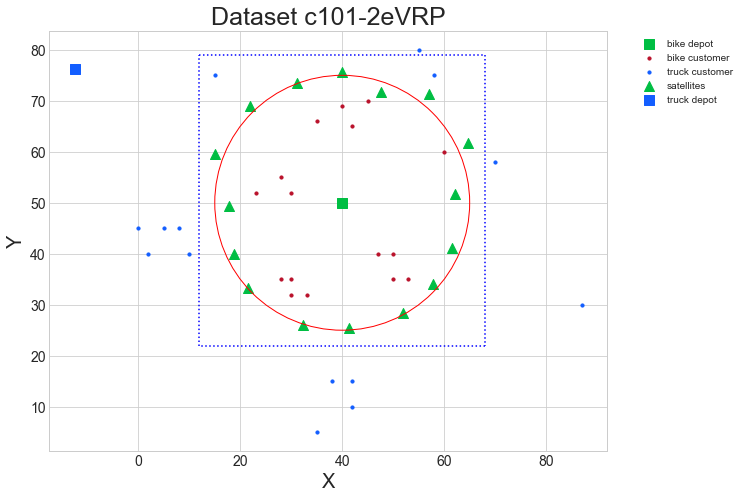

In [133]:
data = df
data.columns = ["CUST NO.", "X", "Y", "DEMAND","READY TIME","DUE TIME","SERVICE TIME","CAPACITY"]

#
acin_r = '#ba122b'
acin_g = '#00be43'
acin_b = '#135eff'
#
#

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,9))
plt.title('Dataset c101-2eVRP',fontsize=25)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)

## VISUALIZATION
bike_depot = [data['X'][0],data['Y'][0]]
# plot bike depot
plt.scatter(bike_depot[0],bike_depot[1],s=10**2,c =acin_g,marker='s',label="bike depot".format('s'))


# DRAW CIRCLE --> inner customer will be assigned for the bike 
#r_bike = 15
r_bike = 25
draw_circle  = plt.Circle((bike_depot[0],bike_depot[1]),r_bike,fill = False,color='r')
plt.gcf().gca().add_artist(draw_circle)

#
data_customer_bike = pd.DataFrame(columns = ["CUST NO.", "X", "Y", "DEMAND",
                                      "READY TIME","DUE TIME","SERVICE TIME"])
data_customer_truck = pd.DataFrame(columns = ["CUST NO.", "X", "Y", "DEMAND",
                                      "READY TIME","DUE TIME","SERVICE TIME"])
for ii in range(1,data.shape[0]):
  temp_dist = math.sqrt((data['X'][ii]-data['X'][0])**2
                        +(data['Y'][ii]-data['Y'][0])**2)
  
  if (temp_dist <= r_bike):
    data_customer_bike = data_customer_bike.append(data.iloc[ii])
  else:
    data_customer_truck = data_customer_truck.append(data.iloc[ii])
# plot bike customer
plt.scatter(data_customer_bike['X'][0:],data_customer_bike['Y'][0:],s=10,c =acin_r, marker='o',label="bike customer".format('0'))
# plot truck customer
plt.scatter(data_customer_truck['X'][0:],data_customer_truck['Y'][0:],s=10,c =acin_b, marker='o',label="truck customer".format('0'))
# create sat data
num_sat = len(data_customer_bike)
#num_sat = 10
#
angle = np.linspace(0.3, 2*math.pi, num=num_sat)
data_sat = pd.DataFrame(columns = ["SAT. NO.", "X", "Y"])
for ii in range(0,num_sat):
  temp_row = pd.Series([ii,data['X'][0] + (r_bike+random.uniform(-3, 3))*math.sin(angle[ii]), data['Y'][0] + (r_bike+random.uniform(-3, 3))*math.cos(angle[ii])], index = data_sat.columns)
  data_sat = data_sat.append(temp_row,ignore_index=True)
# PLOT SAT
plt.scatter(data_sat['X'][0:],data_sat['Y'][0:],s=10**2,c =acin_g, marker='^',label="satellites".format('0'))
#

# increase percentate
inc = 0.05;
max_x = round( max(data_sat['X'][1:]) + inc*max(data_sat['X'][1:]))
max_y = round( max(data_sat['Y'][1:]) + inc*max(data_sat['Y'][1:]))
min_x = round(min(data_sat['X'][1:]) - inc*abs( max(data_sat['X'][1:])))
min_y = round(min(data_sat['Y'][1:]) - inc*abs( max(data_sat['Y'][1:])))
# DRAW BORDER
plt.plot([max_x, max_x],[max_y, min_y],'b:')
plt.plot([max_x, min_x],[min_y, min_y],'b:')
plt.plot([min_x, min_x],[min_y, max_y],'b:')
plt.plot([min_x, max_x],[max_y, max_y],'b:')
# truck depot 50/100
truck_depot = [data['X'][0]-2*r_bike*(1+inc),data['Y'][0]+r_bike*(1+inc)]
plt.scatter(truck_depot[0],truck_depot[1],s=10**2,c =acin_b,marker='s',label="truck depot".format('s'))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.gca().set_aspect('equal')
plt.show()


In [134]:
data_sat

,SAT. NO.,X,Y
0,0.0,47.674978,71.779636
1,1.0,57.117894,71.355005
2,2.0,64.761767,61.699611
3,3.0,62.204366,51.631812
4,4.0,61.612111,41.179727
5,5.0,57.849246,33.979589
6,6.0,51.871862,28.474316
7,7.0,41.250008,25.413892
8,8.0,32.334320,26.034261
9,9.0,21.585175,33.189878


In [135]:
data_customer_bike = data_customer_bike.reset_index(drop=True)



In [136]:
data_customer_truck = data_customer_truck.reset_index(drop=True)


In [137]:
data_customer_bike

,CUST NO.,X,Y,DEMAND,READY TIME,DUE TIME,SERVICE TIME,CAPACITY
0,75.0,53.0,35.0,50.0,353.0,412.0,90.0,NaN
1,6.0,42.0,65.0,10.0,15.0,67.0,90.0,NaN
2,63.0,50.0,35.0,20.0,262.0,317.0,90.0,NaN
3,3.0,45.0,70.0,30.0,825.0,870.0,90.0,NaN
4,28.0,23.0,52.0,10.0,261.0,316.0,90.0,NaN
5,64.0,50.0,40.0,50.0,171.0,218.0,90.0,NaN
6,22.0,30.0,52.0,20.0,914.0,965.0,90.0,NaN
7,68.0,47.0,40.0,10.0,12.0,77.0,90.0,NaN
8,92.0,60.0,60.0,10.0,836.0,889.0,90.0,NaN
9,43.0,33.0,32.0,20.0,68.0,149.0,90.0,NaN


In [138]:
data_customer_truck

,CUST NO.,X,Y,DEMAND,READY TIME,DUE TIME,SERVICE TIME,CAPACITY
0,56.0,42.0,15.0,10.0,95.0,158.0,90.0,NaN
1,100.0,55.0,80.0,10.0,743.0,820.0,90.0,NaN
2,61.0,35.0,5.0,20.0,562.0,629.0,90.0,NaN
3,37.0,5.0,45.0,10.0,665.0,716.0,90.0,NaN
4,85.0,70.0,58.0,20.0,458.0,523.0,90.0,NaN
5,99.0,58.0,75.0,20.0,30.0,84.0,90.0,NaN
6,33.0,10.0,40.0,30.0,31.0,100.0,90.0,NaN
7,55.0,42.0,10.0,40.0,186.0,257.0,90.0,NaN
8,19.0,15.0,75.0,20.0,179.0,254.0,90.0,NaN
9,80.0,87.0,30.0,10.0,668.0,731.0,90.0,NaN


In [139]:
num_customer_truck = len(data_customer_truck)
num_customer_bike = len(data_customer_bike)
num_sat = len(data_sat)

In [140]:
de_b = [data_customer_bike['DEMAND'][i] for i in range(num_customer_bike)]
de_t = [data_customer_truck['DEMAND'][i] for i in range(num_customer_truck)]

## demand_bb (extended with depot and set)

de_bb = [data_customer_bike['DEMAND'][i] for i in range(num_customer_bike)]
de_bb.append(0)
de_bb_sat = [0 for i in range(num_sat)]
de_bb.extend(de_bb_sat)
de_bb.insert(0,0)
##
de_tt = [data_customer_truck['DEMAND'][i] for i in range(num_customer_truck)]
de_tt.append(0)
de_tt_sat = [0 for i in range(num_sat)]
de_tt.extend(de_tt_sat)
de_tt.insert(0,0)



In [141]:
de_bb

[0,
 50.0,
 10.0,
 20.0,
 30.0,
 10.0,
 50.0,
 20.0,
 10.0,
 10.0,
 20.0,
 10.0,
 10.0,
 20.0,
 30.0,
 10.0,
 10.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [142]:
de_tt

[0,
 10.0,
 10.0,
 20.0,
 10.0,
 20.0,
 20.0,
 30.0,
 40.0,
 20.0,
 10.0,
 20.0,
 20.0,
 10.0,
 20.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [143]:
# 
service_time = 10

lb_time_b = [data_customer_bike['READY TIME'][i] for i in range(num_customer_bike)]
lb_time_b.append(df['READY TIME'][0])
lb_time_b.insert(0,df['READY TIME'][0])
##
ub_time_b = [data_customer_bike['DUE TIME'][i] for i in range(num_customer_bike)]
ub_time_b.append(df['DUE TIME'][0])
ub_time_b.insert(0,df['DUE TIME'][0])
##
#ser_time_bb = [data_customer_bike['SERVICE TIME'][i] for i in range(num_customer_bike)]
ser_time_bb = [service_time for i in range(num_customer_bike)]

ser_sat_bb_fix = service_time
ser_sat_bb = [ser_sat_bb_fix for i in range(num_sat)]
ser_time_bb.extend(ser_sat_bb)
ser_time_bb.append(0)
ser_time_bb.insert(0,0)
#
#ser_time_tt = [data_customer_truck['SERVICE TIME'][i] for i in range(num_customer_truck)]
ser_time_tt = [service_time for i in range(num_customer_truck)]
ser_sat_tt_fix = service_time
ser_sat_tt = [ser_sat_tt_fix for i in range(num_sat)]
ser_time_tt.extend(ser_sat_tt)
# 
ser_time_tt.append(0)
ser_time_tt.insert(0,0)

##########
lb_time_sat = [df['READY TIME'][0] for i in range(num_sat)]
ub_time_sat = [df['DUE TIME'][0] for i in range(num_sat)]


lb_time_bb = [data_customer_bike['READY TIME'][i] for i in range(num_customer_bike)]
lb_time_bb.append(df['READY TIME'][0])
lb_time_bb.extend(lb_time_sat)
lb_time_bb.insert(0,df['READY TIME'][0])

ub_time_bb = [data_customer_bike['DUE TIME'][i] for i in range(num_customer_bike)]
ub_time_bb.append(df['DUE TIME'][0])
ub_time_bb.extend(ub_time_sat)
ub_time_bb.insert(0,df['DUE TIME'][0])
##

In [144]:
lb_time_bb

[0,
 353.0,
 15.0,
 262.0,
 825.0,
 261.0,
 171.0,
 914.0,
 12.0,
 836.0,
 68.0,
 357.0,
 1054.0,
 621.0,
 448.0,
 1001.0,
 732.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [145]:
ub_time_bb

[1236,
 412.0,
 67.0,
 317.0,
 870.0,
 316.0,
 218.0,
 965.0,
 77.0,
 889.0,
 149.0,
 410.0,
 1127.0,
 702.0,
 509.0,
 1066.0,
 777.0,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236]

In [146]:
lb_time_t = [data_customer_truck['READY TIME'][i] for i in range(num_customer_truck)]
lb_time_t.append(df['READY TIME'][0])
lb_time_t.insert(0,df['READY TIME'][0])
##
ub_time_t = [data_customer_truck['DUE TIME'][i] for i in range(num_customer_truck)]
ub_time_t.append(df['DUE TIME'][0])
ub_time_t.insert(0,df['DUE TIME'][0])


###
lb_time_tt = [data_customer_truck['READY TIME'][i] for i in range(num_customer_truck)]
lb_time_tt.append(df['READY TIME'][0])
lb_time_tt.extend(lb_time_sat)
lb_time_tt.insert(0,df['READY TIME'][0])

ub_time_tt = [data_customer_truck['DUE TIME'][i] for i in range(num_customer_truck)]
ub_time_tt.append(df['DUE TIME'][0])
ub_time_tt.extend(ub_time_sat)
ub_time_tt.insert(0,df['DUE TIME'][0])



In [147]:
lb_time_tt

[0,
 95.0,
 743.0,
 562.0,
 665.0,
 458.0,
 30.0,
 31.0,
 186.0,
 179.0,
 668.0,
 383.0,
 751.0,
 651.0,
 567.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [148]:
ub_time_tt

[1236,
 158.0,
 820.0,
 629.0,
 716.0,
 523.0,
 84.0,
 100.0,
 257.0,
 254.0,
 731.0,
 434.0,
 816.0,
 740.0,
 624.0,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236,
 1236]

In [149]:
data_customer_bike

,CUST NO.,X,Y,DEMAND,READY TIME,DUE TIME,SERVICE TIME,CAPACITY
0,75.0,53.0,35.0,50.0,353.0,412.0,90.0,NaN
1,6.0,42.0,65.0,10.0,15.0,67.0,90.0,NaN
2,63.0,50.0,35.0,20.0,262.0,317.0,90.0,NaN
3,3.0,45.0,70.0,30.0,825.0,870.0,90.0,NaN
4,28.0,23.0,52.0,10.0,261.0,316.0,90.0,NaN
5,64.0,50.0,40.0,50.0,171.0,218.0,90.0,NaN
6,22.0,30.0,52.0,20.0,914.0,965.0,90.0,NaN
7,68.0,47.0,40.0,10.0,12.0,77.0,90.0,NaN
8,92.0,60.0,60.0,10.0,836.0,889.0,90.0,NaN
9,43.0,33.0,32.0,20.0,68.0,149.0,90.0,NaN


In [150]:
#pd.options.mode.chained_assignment = None  # default='warn'
df2_b = data_customer_bike.copy()
df2_b = df2_b.iloc[:, 1:3]
df2_b.loc[-1] = bike_depot
df2_b.index = df2_b.index + 1
df2_b.sort_index(inplace=True) 
#
df2_b = df2_b.append(data_sat.iloc[:,1:3],ignore_index = True)
#
df2_b.loc[len(df2_b)] = bike_depot

In [151]:
df2_b

,X,Y
0,40.000000,50.000000
1,53.000000,35.000000
2,42.000000,65.000000
3,50.000000,35.000000
4,45.000000,70.000000
5,23.000000,52.000000
6,50.000000,40.000000
7,30.000000,52.000000
8,47.000000,40.000000
9,60.000000,60.000000


In [152]:
df2_t = data_customer_truck.copy()
df2_t = df2_t.iloc[:, 1:3]
df2_t.loc[-1] = truck_depot
df2_t.index = df2_t.index + 1
df2_t.sort_index(inplace=True) 
#
df2_t = df2_t.append(data_sat.iloc[:,1:3],ignore_index = True)
#
df2_t.loc[len(df2_t)] = truck_depot

In [153]:
df2_t

,X,Y
0,-12.500000,76.250000
1,42.000000,15.000000
2,55.000000,80.000000
3,35.000000,5.000000
4,5.000000,45.000000
5,70.000000,58.000000
6,58.000000,75.000000
7,10.000000,40.000000
8,42.000000,10.000000
9,15.000000,75.000000


In [154]:
data_sat

,SAT. NO.,X,Y
0,0.0,47.674978,71.779636
1,1.0,57.117894,71.355005
2,2.0,64.761767,61.699611
3,3.0,62.204366,51.631812
4,4.0,61.612111,41.179727
5,5.0,57.849246,33.979589
6,6.0,51.871862,28.474316
7,7.0,41.250008,25.413892
8,8.0,32.334320,26.034261
9,9.0,21.585175,33.189878


In [155]:
t_end = 't' + str(num_customer_truck + 1)
b_end = 'b' + str(num_customer_bike + 1)
#
print(t_end)
print(b_end)

t15
b17


In [156]:
Cs = [('s%d' %(i)) for i in range(1, num_sat + 1)]
#
Ct = [('t%d' %(i)) for i in range(1, num_customer_truck + 1)]
#
Ctt = ['t0'] + Ct + Cs + [t_end]
#
Cb = [('b%d' %(i)) for i in range(1, num_customer_bike + 1)]
Cbb = ['b0'] + Cb + Cs + [b_end]
kt = [('vt%d' %(i)) for i in range(1, num_customer_truck + 1)]
kb = [('vb%d' %(i)) for i in range(1, num_customer_bike + 1)]
# Extended set
Ce = Ct + Cb + Cs
# after node 
Db = [(i) for i in Cbb]
Dt = [(i) for i in Ctt]
#
Ctt_reduce = ['t0'] + Ct + [t_end]
Cbb_reduce =  ['b0'] + Cb  + [b_end]

In [157]:
lb_time_b = pd.DataFrame(lb_time_b,index =Cbb_reduce)
ub_time_b = pd.DataFrame(ub_time_b,index =Cbb_reduce)

In [158]:
lb_time_t = pd.DataFrame(lb_time_t,index =Ctt_reduce)
ub_time_t = pd.DataFrame(ub_time_t,index =Ctt_reduce)

In [159]:
lb_time_bb = pd.DataFrame(lb_time_bb,index =Cbb)
ub_time_bb = pd.DataFrame(ub_time_bb,index =Cbb)

lb_time_tt = pd.DataFrame(lb_time_tt,index =Ctt)
ub_time_tt = pd.DataFrame(ub_time_tt,index =Ctt)

In [160]:
ser_time_bb = pd.DataFrame(ser_time_bb,index =Cbb)
ser_time_tt = pd.DataFrame(ser_time_tt,index =Ctt)

In [161]:
df2_t.index = Ctt
df2_b.index = Cbb
## create dist & time matrix
dist_matrix_t = pd.DataFrame(distance_matrix(df2_t.values, df2_t.values), index=df2_t.index, columns=df2_t.index)
dist_matrix_b = pd.DataFrame(distance_matrix(df2_b.values, df2_b.values), index=df2_b.index, columns=df2_b.index)


In [162]:
time_matrix_t = dist_matrix_t.copy()

time_matrix_t = time_matrix_t/3

In [163]:
time_matrix_b = dist_matrix_b.copy()

In [164]:
time_matrix_b = time_matrix_b

In [165]:
de_b = pd.DataFrame(de_b,index = Cb)
de_t = pd.DataFrame(de_t,index = Ct)
##
de_bb = pd.DataFrame(de_bb,index = Cbb)
de_tt = pd.DataFrame(de_tt,index = Ctt)

In [166]:
Xt = [(i, j, k) for i in Ctt for j in Ctt for k in kt if (i != j)]
Xb = [(i, j, k) for i in Cbb for j in Cbb for k in kb if (i != j)]

In [167]:
set_demand_bs = [(i) for i in Db]
set_demand_ts = [(i) for i in Dt]

# avoid subtour
u_detour_bs_set = [(i,k) for i in Cbb for k in kb]
u_detour_ts_set = [(i,k) for i in Ctt for k in kt]

In [168]:
arr_ts_set = [i for i in Ctt]
arr_bs_set = [i for i in Cbb]

In [169]:
Wts = [(i,k) for i in Ctt for k in kt]
Wbs = [(i,k) for i in Cbb for k in kb]

In [170]:
Vb = ['b0'] + Cb
Vt = ['t0'] + Ct

In [171]:
Vb_cs = Cb + Cs
Vt_cs = Ct + Cs

In [172]:
big_M_1 = 200*2
Qb = 60 # capacity of /b/
Qt = 200 # capacity of /t/

mdl = Model('2e_vrptw')

## graph for 't' and 'b' cust

xt = mdl.binary_var_dict(Xt, name='xt')
print("{} decision variables for the type t".format(len(xt)))
xb = mdl.binary_var_dict(Xb, name='xb')
print("{} decision variables for the type b".format(len(xb)))

## graph for cap and ... time?
ubs =  mdl.continuous_var_dict(set_demand_bs,0,Qb, name='ubs')
uts =  mdl.continuous_var_dict(set_demand_ts,0,Qt, name='uts')
## graph for arriving time
#wbs =  mdl.integer_var_dict(Wbs,0,l[0], name='wbs')
#wts =  mdl.integer_var_dict(Wts,0,l[0], name='wts')
##
u_detour_bs = mdl.continuous_var_dict(u_detour_bs_set, name='u_detour_bs')
u_detour_ts = mdl.continuous_var_dict(u_detour_ts_set, name='u_detour_ts')

##
arr_ts = mdl.continuous_var_dict(arr_ts_set,name='arr_ts')
arr_bs = mdl.continuous_var_dict(arr_bs_set,name='arr_bs')

13888 decision variables for the type t
17952 decision variables for the type b


In [173]:
# start and end of 't', 't0' and t_end are the truck depot, e.g., Eq. (2) & (3)
#mdl.add_constraints((mdl.sum(xt['t0', j, k] for j in Ctt if j != 't0') - mdl.sum(xt[j,t_end,k] for j in Ctt if j != t_end and j!= 't0'))==0 for k in kt)
# start and end of 'b', 'b0' and b_end are the truck depot, e.g., Eq. (4) & (5)
#mdl.add_constraints(mdl.sum(xb['b0', j, k] for j in Cbb if j != 'b0') <= 1 for k in kb)
#mdl.add_constraints((mdl.sum(xb['b0', j, k] for j in Cbb if j != 'b0') - mdl.sum(xb[j,b_end,k] for j in Cb if j != b_end and j!='b0'))==0 for k in kb)

## detour from any customer or sat to b0
#mdl.add_constraints(mdl.sum(xb[i,'b0',k] for i in Cbb if i!='b0') ==0 for k in kb)
#mdl.add_constraints(mdl.sum(xt[i,'t0',k] for i in Ctt if i!='t0') ==0 for k in kt)
#mdl.add_constraints(mdl.sum(xb[b_end,i,k] for i in Cbb if i!=b_end) ==0 for k in kb)
#mdl.add_constraints(mdl.sum(xt[t_end,i,k] for i in Ctt if i!=t_end) ==0 for k in kt)

# start and end of 't', 't0' and t_end are the truck depot, e.g., Eq. (2) & (3)
#mdl.add_constraints(mdl.sum(xt['t0', j, k] for j in Ctt if j != 't0') <= 1 for k in kt)
#mdl.add_constraints((mdl.sum(xt['t0', j, k] for j in Ctt if j != 't0') - mdl.sum(xt[j,t_end,k] for j in Ctt if j != t_end))==0 for k in kt)
# start and end of 'b', 'b0' and b_end are the truck depot, e.g., Eq. (4) & (5)
#mdl.add_constraints(mdl.sum(xb['b0', j, k] for j in Cbb if j != 'b0') <= 1 for k in kb)
#mdl.add_constraints((mdl.sum(xb['b0', j, k] for j in Cbb if j != 'b0') - mdl.sum(xb[j,b_end,k] for j in Cb if j != b_end))==0 for k in kb)

## detour from any customer or sat to b0
#mdl.add_constraints(mdl.sum(xb[i,'b0',k] for i in Cbb if i!='b0') ==0 for k in kb)
#mdl.add_constraints(mdl.sum(xt[i,'t0',k] for i in Ctt if i!='t0') ==0 for k in kt)
#mdl.add_constraints(mdl.sum(xb[b_end,i,k] for i in Cbb if i!=b_end) ==0 for k in kb)
#mdl.add_constraints(mdl.sum(xt[t_end,i,k] for i in Ctt if i!=t_end) ==0 for k in kt)


### NEW
mdl.add_constraints(mdl.sum(xt['t0', j, k] for j in Ctt if j != 't0') == 1 for k in kt)
mdl.add_constraints(mdl.sum(xt[i,t_end, k] for i in Ctt if i != t_end) == 1 for k in kt)
##########
mdl.add_constraints(mdl.sum(xb['b0', j, k] for j in Cbb if j != 'b0') == 1 for k in kb)
mdl.add_constraints(mdl.sum(xb[i,b_end, k] for i in Cbb if i != b_end) == 1 for k in kb)

mdl.add_constraints(mdl.sum(xb[i,'b0',k] for i in Cbb if i!='b0') ==0 for k in kb)
mdl.add_constraints(mdl.sum(xt[i,'t0',k] for i in Ctt if i!='t0') ==0 for k in kt)
mdl.add_constraints(mdl.sum(xb[b_end,i,k] for i in Cbb if i!=b_end) ==0 for k in kb)
mdl.add_constraints(mdl.sum(xt[t_end,i,k] for i in Ctt if i!=t_end) ==0 for k in kt)

[docplex.mp.LinearConstraint[](xt_t15_t0_vt1+xt_t15_t1_vt1+xt_t15_t2_vt1+xt_t15_t3_vt1+xt_t15_t4_vt1+xt_t15_t5_vt1+xt_t15_t6_vt1+xt_t15_t7_vt1+xt_t15_t8_vt1+xt_t15_t9_vt1+xt_t15_t10_vt1+xt_t15_t11_vt1+xt_t15_t12_vt1+xt_t15_t13_vt1+xt_t15_t14_vt1+xt_t15_s1_vt1+xt_t15_s2_vt1+xt_t15_s3_vt1+xt_t15_s4_vt1+xt_t15_s5_vt1+xt_t15_s6_vt1+xt_t15_s7_vt1+xt_t15_s8_vt1+xt_t15_s9_vt1+xt_t15_s10_vt1+xt_t15_s11_vt1+xt_t15_s12_vt1+xt_t15_s13_vt1+xt_t15_s14_vt1+xt_t15_s15_vt1+xt_t15_s16_vt1,EQ,0),
 docplex.mp.LinearConstraint[](xt_t15_t0_vt2+xt_t15_t1_vt2+xt_t15_t2_vt2+xt_t15_t3_vt2+xt_t15_t4_vt2+xt_t15_t5_vt2+xt_t15_t6_vt2+xt_t15_t7_vt2+xt_t15_t8_vt2+xt_t15_t9_vt2+xt_t15_t10_vt2+xt_t15_t11_vt2+xt_t15_t12_vt2+xt_t15_t13_vt2+xt_t15_t14_vt2+xt_t15_s1_vt2+xt_t15_s2_vt2+xt_t15_s3_vt2+xt_t15_s4_vt2+xt_t15_s5_vt2+xt_t15_s6_vt2+xt_t15_s7_vt2+xt_t15_s8_vt2+xt_t15_s9_vt2+xt_t15_s10_vt2+xt_t15_s11_vt2+xt_t15_s12_vt2+xt_t15_s13_vt2+xt_t15_s14_vt2+xt_t15_s15_vt2+xt_t15_s16_vt2,EQ,0),
 docplex.mp.LinearConstraint[](x

In [174]:
en_block_1 = 1
if en_block_1:
    # (6) and (7)
    # t pass each customer p and move to another node j (can be customer or sattelites) of t
    mdl.add_constraints((mdl.sum(xt[i, p, k] for i in Ctt if i != p) - mdl.sum(xt[p, j, k] for j in Ctt if p != j)) == 0 for p in Ct for k in  kt)
    # each i customer of t is visited only 1 time
    Ct_ex = ['t0'] + Ct + [t_end]
    mdl.add_constraints(mdl.sum(xt[i, j, k] for j in Ctt for k in kt if j!=i) == 1 for i in Ct)
    ######################
    # b pass each customer p and move to another node j (can be customer or sattelites) of b
    mdl.add_constraints((mdl.sum(xb[i, p, k] for i in Cbb if i != p) - mdl.sum(xb[p, j, k] for j in Cbb if p != j)) == 0 for p in Cb for k in  kb)
    # each i customer of b is visited only 1 time
    Cb_ex = ['b0'] + Cb + [b_end]
    mdl.add_constraints(mdl.sum(xb[i, j, k] for j in Cbb for k in kb if j!=i) == 1 for i in Cb)


    ## avoid sub-tour/Miller-Tucker-Zemlin formulation

    #mdl.add_constraints(u_detour_bs[j,k]-u_detour_bs[i,k] - de_bb.loc[j,0] - Qb*(xb[i,j,k]-1) >= 0 for i in Cbb for j in Cbb for k in kb if (i!=j))
    #mdl.add_constraints(u_detour_ts[j,k]-u_detour_ts[i,k] - de_tt.loc[j,0] - Qt*(xt[i,j,k]-1) >= 0 for i in Ctt for j in Ctt for k in kt if (i!=j))

    mdl.add_constraints(u_detour_bs[j,k]-u_detour_bs[i,k] - 1 - Qb*(xb[i,j,k]-1) >= 0 for i in Cbb for j in Cbb for k in kb if (i!=j))
    mdl.add_constraints(u_detour_ts[j,k]-u_detour_ts[i,k] - 1 - Qt*(xt[i,j,k]-1) >= 0 for i in Ctt for j in Ctt for k in kt if (i!=j))


In [175]:
en_block_2 = 1
if en_block_2:
    # if a 'b' passes a sattelite, it needs to go the 'c' or ? !!
    # (8), (9), & (10)
    mdl.add_constraints((mdl.sum(xt[i,p,k] for i in Ctt if i!=p) - mdl.sum(xt[p,j,k] for j in Ctt if j!=p))== 0 for p in Cs for k in kt)
    #mdl.add_constraints( mdl.sum(xt[i,p,k] for i in Ctt for k in kt if i!=p)<= 1 for p in Cs) # only 1
    mdl.add_constraints( mdl.sum(xt[p,j,k] for j in Ctt for k in kt if j!=p)<= 1 for p in Cs) # only 1

    mdl.add_constraints((mdl.sum(xb[i,p,k] for i in Cbb if i!=p) - mdl.sum(xb[p,j,k] for j in Cbb if j!=p))== 0 for p in Cs for k in kb)
    #mdl.add_constraints( mdl.sum(xb[i,p,k] for i in Cbb for k in kb if i!=p) <= 1 for p in Cs) # only 1
    mdl.add_constraints( mdl.sum(xb[p,j,k] for j in Cbb for k in kb if j!=p) <= 1 for p in Cs) # only 1
    # (11)
    mdl.add_constraints((mdl.sum(xb[i,p,k_b] for i in Cbb if (i!=p) for k_b in kb) - mdl.sum(xt[j,p,k_t] for j in Ctt if (j!=p) for k_t in kt))==0 for p in Cs)


In [176]:
cap_b_lim = [Qb for i in Cbb]
cap_b_lim[0] = 0
cap_b_lim[-1] = 0
cap_b_lim = pd.DataFrame(cap_b_lim, index = Cbb)

In [177]:
en_demand = 1
if en_demand:
# (12) - (17)
    # mdl.add_constraints(ubs[i] == 0 for i in Cbb and (i=='b0'))
    mdl.add_constraints(ubs[i] - de_b.loc[j,0] - ubs[j] - (xb[i,j,k]-1)*big_M_1 >= 0 for k in kb for i in Cbb for j in Cb if (i!=j))
    # empty when reaching sat (this is a very hard contraints)
    mdl.add_constraints(ubs[i] - big_M_1*(1-mdl.sum(xb[i,p,k] for p in Cs for k in kb)) <=0 for i in Cb)
    # recplace with ... 
    # 
    mdl.add_constraints(ubs[i] >= 0 for i in Cbb)
    # relax problem here
    #mdl.add_constraints(ubs[i] <= Qb for i in Cbb)
    # enforce to visit sattelites here
    mdl.add_constraints(ubs[i] <= cap_b_lim.loc[i,0] for i in Cbb)
    #
    # force pass 'b0' to 's' --> wrong because you have to pass all satellites but it is not true here
    #mdl.add_constraints(mdl.sum(xb['b0',j,k] for j in Cbb_reduce if (j!='b0') and (j!=b_end)) ==0 for k in kb)
    ### for 't'
    Ctt_reduce = ['t0'] + Ct + [t_end]
    mdl.add_constraints(uts[i] - de_t.loc[j,0] - uts[j] - big_M_1*(xt[i,j,k]-1)>= 0 for k in kt for i in Ctt for j in Ct if (i!=j))
    mdl.add_constraints(uts[i] - ubs[j] - uts[j] - big_M_1*(xt[i,j,k]-1) >=0 for k in kt for i in Ctt for j in Cs if (i!=j))

    ##
    # 
    mdl.add_constraints(uts[i] >= 0 for i in Ctt)
    mdl.add_constraints(uts[i] <= Qt for i in Ctt)

    

In [178]:
end_tw = 0
if (end_tw):
    mdl.add_constraints(wts[i,k] + ser_time_tt.loc[i,0] + time_matrix_t.loc[i,j] - K*(1 - xt[i,j,k]) - wts[j,k] <=0 for i in Ctt for j in Ctt for k in kt if (i!=j))
    mdl.add_constraints(wts['t0',k] == 0 for k in kt)
    mdl.add_constraints(wts[i,k] >= lb_time_t.loc[i,0] for i in Ctt_reduce for k in kt if (i!='t0'))
    mdl.add_constraints(wts[i,k] <= ub_time_t.loc[i,0] for i in Ctt_reduce for k in kt if (i!='t0'))

    #
    mdl.add_constraints(wbs[i,k] + ser_time_bb.loc[i,0] + time_matrix_b.loc[i,j] - K*(1 - xb[i,j,k]) - wbs[j,k] <=0 for i in Cbb for j in Cbb for k in kb if (i!=j))
    mdl.add_constraints(wbs['b0',k] ==0 for k in kb)
    mdl.add_constraints(wbs[i,k] >= lb_time_b.loc[i,0] for i in Cbb_reduce for k in kb if (i!='b0'))
    mdl.add_constraints(wbs[i,k] <= ub_time_b.loc[i,0] for i in Cbb_reduce for k in kb if (i!='b0'))
    #
    # SYNCHRONIZATION
    for i in Cs:
        mdl.add_constraints(wts[i,j] - wts[i,k] == 0 for j in kt for k in kt if (j!=k))
        mdl.add_constraints(wbs[i,j] - wbs[i,k] == 0 for j in kb for k in kb if (j!=k))
    # 
    sync_diff = 45

    mdl.add_constraints(wts[s,'vt1'] - wbs[s,'vb1'] <= sync_diff for s in Cs)
    mdl.add_constraints(wts[s,'vt1'] - wbs[s,'vb1'] >= -sync_diff for s in Cs)
##
en_tw_2 = 1
if (en_tw_2):
    mdl.add_constraints(arr_ts[i] + ser_time_tt.loc[i,0] + time_matrix_t.loc[i,j] - K*(1 - mdl.sum(xt[i,j,k] for k in kt)) - arr_ts[j] <=0 for i in Ctt for j in Ctt if (i!=j))
    mdl.add_constraints(arr_ts[i] >= lb_time_tt.loc[i,0] for i in Ctt)
    mdl.add_constraints(arr_ts[i] <= ub_time_tt.loc[i,0] for i in Ctt)
    
    ##
    mdl.add_constraints(arr_bs[i] + ser_time_bb.loc[i,0] + time_matrix_b.loc[i,j] - K*(1 - mdl.sum(xb[i,j,k] for k in kb)) - arr_bs[j] <=0 for i in Cbb for j in Cbb if (i!=j))
    mdl.add_constraints(arr_bs[i] >= lb_time_bb.loc[i,0] for i in Cbb)
    mdl.add_constraints(arr_bs[i] <= ub_time_bb.loc[i,0] for i in Cbb)
    
    ## SYNC
    sync_diff = 10

    mdl.add_constraints(arr_bs[s] - arr_ts[s] <= sync_diff for s in Cs)
    mdl.add_constraints(arr_bs[s] - arr_ts[s] >= -sync_diff for s in Cs)

In [179]:
obj_function = mdl.sum( time_matrix_t.loc[i,j] * xt[i, j, k] for i in Ctt for j in Ctt for k in kt if (i!=j) ) + mdl.sum( time_matrix_b.loc[i,j] * xb[i, j, k] for i in Cbb for j in Cbb for k in kb if (i!=j) )
mdl.parameters.timelimit.set(100)

# Solve
mdl.minimize(obj_function)

time_solve = time.time()

solution = mdl.solve(log_output = True)

time_end = time.time()
# print(solution)

running_time = round(time_end - time_solve, 2)
elapsed_time = round(time_end - time_start, 2)

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               100
Tried aggregator 1 time.
MIP Presolve eliminated 4826 rows and 5174 columns.
MIP Presolve modified 42949 coefficients.
Reduced MIP has 52038 rows, 27790 columns, and 274100 nonzeros.
Reduced MIP has 26674 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.14 sec. (231.44 ticks)
Probing time = 0.16 sec. (22.72 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 52038 rows, 27790 columns, and 274100 nonzeros.
Reduced MIP has 26674 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.17 sec. (199.77 ticks)
Probing time = 0.08 sec. (19.39 ticks)
Clique table members: 142279.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 16 threads.
Root relaxation solution time = 0.50 sec. (547.23 ticks)

        Nodes      

In [180]:
if solution != None:
  route_t = [xt['t0', j, k] for j in Ctt if (j!='t0') and (j!=t_end) for k in kt if xt['t0', j, k].solution_value == 1]
  route_b = [xb['b0', j, k] for j in Cbb if (j!='b0') and (j!=b_end) for k in kb if xb['b0', j, k].solution_value == 1]
  no_of_t = len(route_t)
  no_of_b = len(route_b)
  obj = round(obj_function.solution_value, 2)
  print(cust_size, no_of_t,no_of_b, obj, elapsed_time, running_time)
else:
  print(cust_size, 'NA', 'NA', elapsed_time, running_time)

30 14 15 1362.24 107.95 100.26


In [181]:
mdl.print_solution()

objective: 1362.245
  xt_t0_t1_vt14=1
  xt_t0_t5_vt9=1
  xt_t0_t6_vt12=1
  xt_t0_t7_vt2=1
  xt_t0_t9_vt3=1
  xt_t0_t11_vt6=1
  xt_t0_t12_vt11=1
  xt_t0_t14_vt10=1
  xt_t0_s1_vt7=1
  xt_t0_s9_vt4=1
  xt_t0_s10_vt8=1
  xt_t0_s11_vt5=1
  xt_t0_s13_vt13=1
  xt_t0_s15_vt1=1
  xt_t1_t8_vt14=1
  xt_t2_s16_vt9=1
  xt_t3_t13_vt14=1
  xt_t4_t15_vt14=1
  xt_t5_t2_vt9=1
  xt_t6_s2_vt12=1
  xt_t7_t15_vt2=1
  xt_t8_t3_vt14=1
  xt_t9_t15_vt3=1
  xt_t10_s4_vt7=1
  xt_t11_t15_vt6=1
  xt_t12_t15_vt11=1
  xt_t13_s8_vt14=1
  xt_t14_t15_vt10=1
  xt_s1_s3_vt7=1
  xt_s2_s14_vt12=1
  xt_s3_s5_vt7=1
  xt_s4_s12_vt7=1
  xt_s5_s6_vt7=1
  xt_s6_s7_vt7=1
  xt_s7_t10_vt7=1
  xt_s8_t4_vt14=1
  xt_s9_t15_vt4=1
  xt_s10_t15_vt8=1
  xt_s11_t15_vt5=1
  xt_s12_t15_vt7=1
  xt_s13_t15_vt13=1
  xt_s14_t15_vt12=1
  xt_s15_t15_vt1=1
  xt_s16_t15_vt9=1
  xb_b0_s1_vb4=1
  xb_b0_s2_vb16=1
  xb_b0_s3_vb9=1
  xb_b0_s4_vb15=1
  xb_b0_s5_vb13=1
  xb_b0_s6_vb3=1
  xb_b0_s8_vb12=1
  xb_b0_s9_vb5=1
  xb_b0_s10_vb2=1
  xb_b0_s11_vb11=1


In [182]:
mdl.get_solve_status()
# https://ibmdecisionoptimization.github.io/docplex-doc/mp/_modules/docplex/util/environment.html

<JobSolveStatus.FEASIBLE_SOLUTION: 1>

In [183]:
route_t

[docplex.mp.Var(type=B,name='xt_t0_t1_vt14'),
 docplex.mp.Var(type=B,name='xt_t0_t5_vt9'),
 docplex.mp.Var(type=B,name='xt_t0_t6_vt12'),
 docplex.mp.Var(type=B,name='xt_t0_t7_vt2'),
 docplex.mp.Var(type=B,name='xt_t0_t9_vt3'),
 docplex.mp.Var(type=B,name='xt_t0_t11_vt6'),
 docplex.mp.Var(type=B,name='xt_t0_t12_vt11'),
 docplex.mp.Var(type=B,name='xt_t0_t14_vt10'),
 docplex.mp.Var(type=B,name='xt_t0_s1_vt7'),
 docplex.mp.Var(type=B,name='xt_t0_s9_vt4'),
 docplex.mp.Var(type=B,name='xt_t0_s10_vt8'),
 docplex.mp.Var(type=B,name='xt_t0_s11_vt5'),
 docplex.mp.Var(type=B,name='xt_t0_s13_vt13'),
 docplex.mp.Var(type=B,name='xt_t0_s15_vt1')]

In [184]:
route_b

[docplex.mp.Var(type=B,name='xb_b0_s1_vb4'),
 docplex.mp.Var(type=B,name='xb_b0_s2_vb16'),
 docplex.mp.Var(type=B,name='xb_b0_s3_vb9'),
 docplex.mp.Var(type=B,name='xb_b0_s4_vb15'),
 docplex.mp.Var(type=B,name='xb_b0_s5_vb13'),
 docplex.mp.Var(type=B,name='xb_b0_s6_vb3'),
 docplex.mp.Var(type=B,name='xb_b0_s8_vb12'),
 docplex.mp.Var(type=B,name='xb_b0_s9_vb5'),
 docplex.mp.Var(type=B,name='xb_b0_s10_vb2'),
 docplex.mp.Var(type=B,name='xb_b0_s11_vb11'),
 docplex.mp.Var(type=B,name='xb_b0_s12_vb7'),
 docplex.mp.Var(type=B,name='xb_b0_s13_vb1'),
 docplex.mp.Var(type=B,name='xb_b0_s14_vb10'),
 docplex.mp.Var(type=B,name='xb_b0_s15_vb8'),
 docplex.mp.Var(type=B,name='xb_b0_s16_vb14')]

In [185]:
#
route_t_var = []
route_t_single = [] # continous route
#
route_t_var_tw = [] # time windows variables
#
route_t_cost = []
#
veh_num = [k for j in Ctt if (j!='t0') and (j!=t_end) for k in kt if xt['t0', j, k].solution_value == 1]
for k in range(0,len(veh_num)):
    kk = veh_num[k]
    route_t_var.append([(i,j) for i in Ctt for j in Ctt if  (i!=j and xt[i,j,kk].solution_value == 1)])
    #
    route_t_var[k] = arrange_route(route_t_var[k])
    route_current = route_t_var[k]
    
    route_t_var_tw.append([(arr_ts[i].solution_value,arr_ts[j].solution_value) for i,j in route_current])

In [186]:
route_t_var

[[('t0', 't1'),
  ('t1', 't8'),
  ('t8', 't3'),
  ('t3', 't13'),
  ('t13', 's8'),
  ('s8', 't4'),
  ('t4', 't15')],
 [('t0', 't5'), ('t5', 't2'), ('t2', 's16'), ('s16', 't15')],
 [('t0', 't6'), ('t6', 's2'), ('s2', 's14'), ('s14', 't15')],
 [('t0', 't7'), ('t7', 't15')],
 [('t0', 't9'), ('t9', 't15')],
 [('t0', 't11'), ('t11', 't15')],
 [('t0', 't12'), ('t12', 't15')],
 [('t0', 't14'), ('t14', 't15')],
 [('t0', 's1'),
  ('s1', 's3'),
  ('s3', 's5'),
  ('s5', 's6'),
  ('s6', 's7'),
  ('s7', 't10'),
  ('t10', 's4'),
  ('s4', 's12'),
  ('s12', 't15')],
 [('t0', 's9'), ('s9', 't15')],
 [('t0', 's10'), ('s10', 't15')],
 [('t0', 's11'), ('s11', 't15')],
 [('t0', 's13'), ('s13', 't15')],
 [('t0', 's15'), ('s15', 't15')]]

In [187]:
route_t_var_tw

[[(0, 158.0),
  (158.0, 186.0),
  (186.0, 562.0),
  (562.0, 651.0),
  (651.0, 664.6364162508507),
  (664.6364162508507, 688.3707152260322),
  (688.3707152260322, 1236.0)],
 [(0, 523.0),
  (523.0, 743.0),
  (743.0, 862.486829774829),
  (862.486829774829, 1236.0)],
 [(0, 32.80287833105103),
  (32.80287833105103, 44.052949245895434),
  (44.052949245895434, 663.9613065312078),
  (663.9613065312078, 1236.0)],
 [(0, 100.0), (100.0, 1236.0)],
 [(0, 254.0), (254.0, 1236.0)],
 [(0, 383.0), (383.0, 1236.0)],
 [(0, 816.0), (816.0, 1236.0)],
 [(0, 567.0), (567.0, 1236.0)],
 [(0, 58.15868543620854),
  (58.15868543620854, 189.4080490066208),
  (189.4080490066208, 206.32811619286986),
  (206.32811619286986, 309.08470418311845),
  (309.08470418311845, 405.37751998394924),
  (405.37751998394924, 668.0),
  (668.0, 688.9684331555309),
  (688.9684331555309, 713.7937787416304),
  (713.7937787416304, 1236.0)],
 [(0, 35.161861823182335), (35.161861823182335, 1236.0)],
 [(0, 1059.3346772605728), (1059.3346772

In [188]:
#
route_b_var = []
route_b_single = [] # continous route
#
route_b_var_tw = [] # time windows variables
#
route_t_cost = []
#
veh_num = [k for j in Cbb for k in kb if j!='b0' and j!= b_end and xb['b0', j, k].solution_value == 1]
for k in range(0,len(veh_num)):
    kk = veh_num[k]
    route_b_var.append([(i,j) for i in Cbb for j in Cbb if  (i!=j and xb[i,j,kk].solution_value == 1)])
    #
    route_b_var[k] = arrange_route(route_b_var[k])
    route_current = route_b_var[k]
    route_b_single.append([ind for ind_e in route_current for ind in ind_e])
    #route_b_single[k] = set(route_single[k])
    route_b_var_tw.append([(arr_bs[i].solution_value,arr_bs[j].solution_value) for i,j in route_current])

In [189]:
route_b_var

[[('b0', 's1'), ('s1', 'b2'), ('b2', 'b17')],
 [('b0', 's2'), ('s2', 'b8'), ('b8', 'b17')],
 [('b0', 's3'), ('s3', 'b9'), ('b9', 'b17')],
 [('b0', 's4'), ('s4', 'b17')],
 [('b0', 's5'), ('s5', 'b6'), ('b6', 'b17')],
 [('b0', 's6'), ('s6', 'b3'), ('b3', 's7'), ('s7', 'b1'), ('b1', 'b17')],
 [('b0', 's8'), ('s8', 'b17')],
 [('b0', 's9'), ('s9', 'b10'), ('b10', 'b14'), ('b14', 'b12'), ('b12', 'b17')],
 [('b0', 's10'), ('s10', 'b15'), ('b15', 'b17')],
 [('b0', 's11'), ('s11', 'b17')],
 [('b0', 's12'), ('s12', 'b16'), ('b16', 'b17')],
 [('b0', 's13'), ('s13', 'b5'), ('b5', 'b17')],
 [('b0', 's14'), ('s14', 'b13'), ('b13', 'b7'), ('b7', 'b17')],
 [('b0', 's15'), ('s15', 'b11'), ('b11', 'b17')],
 [('b0', 's16'), ('s16', 'b4'), ('b4', 'b17')]]

In [190]:
route_b_var_tw

[[(0, 48.15868543620854), (48.15868543620854, 67.0), (67.0, 1236.0)],
 [(0, 34.052949245895434), (34.052949245895434, 77.0), (77.0, 1236.0)],
 [(0, 179.4080490066208), (179.4080490066208, 836.0), (836.0, 1236.0)],
 [(0, 678.9684331555309), (678.9684331555309, 1236.0)],
 [(0, 196.32811619286986), (196.32811619286986, 218.0), (218.0, 1236.0)],
 [(0, 299.08470418311845),
  (299.08470418311845, 317.0),
  (317.0, 395.37751998394924),
  (395.37751998394924, 412.0),
  (412.0, 1236.0)],
 [(0, 674.6364162508507), (674.6364162508507, 1236.0)],
 [(0, 25.161861823182335),
  (25.161861823182335, 149.0),
  (149.0, 509.0),
  (509.0, 1054.0),
  (1054.0, 1236.0)],
 [(0, 1049.3346772605728), (1049.3346772605728, 1066.0), (1066.0, 1236.0)],
 [(0, 1200.0380898403273), (1200.0380898403273, 1236.0)],
 [(0, 703.7937787416304), (703.7937787416304, 777.0), (777.0, 1236.0)],
 [(0, 295.0115802752516), (295.0115802752516, 316.0), (316.0, 1236.0)],
 [(0, 673.9613065312078),
  (673.9613065312078, 702.0),
  (702.0, 